#Figure 1(i): 3D State Plots with Profiles
This notebook reproduces figure with the 3D plots of the different states which occurred during hysteresis, along with the profiles diplayed below the 3D plots.

The 3D plots were created using Paraview (http://www.paraview.org/). The VTK files are located in the directory, *data/hysteresis/3d_from_paraview/vtk/*

The 3D plots were all created from the simulations of a nanocylinder with thickness, $t=55$nm, apart from the last figure, (h), which was taken from the simulation of a $t=35$nm thick nanocylinder (as this state did not occur in the $t=55$ nanocylinder).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib._png import read_png

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


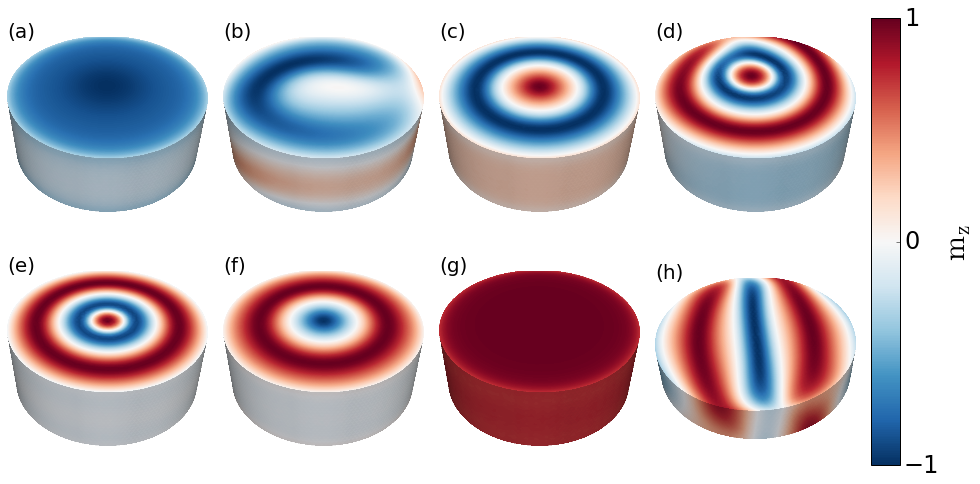

In [2]:
# Create the figure containing the 3D images.

fig = plt.figure(figsize=(16,8))
gs = gridspec.GridSpec(2, 5, width_ratios=[7,7,7,7,1], hspace=0.1, wspace=0.1)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[0,2])
ax3 = plt.subplot(gs[0,3])
ax4 = plt.subplot(gs[1,0])
ax5 = plt.subplot(gs[1,1])
ax6 = plt.subplot(gs[1,2])
ax7 = plt.subplot(gs[1,3])
ax8 = plt.subplot(gs[0:2, 4])
 
# Note that 'states' is a list of index values associated with the hysteresis loop simulation.
# They define which step number from the hysteresis simulation where these 3D plots were taken
# from. There were 801 steps in the hysteresis loop in total. Thus the first 3D plot, (a)
# was the relaxed state from the 155th step of the hysteresis.
states = [155, 175, 184, 210, 215, 225, 304, 217]
labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']

for i, state in enumerate(states):
    if state == 217:
        imageFileName = '../data/figure_1/3d_data/images/'\
                        'sim_hysteresis_FeGe_nanodisk_d150_h35_{}.png'.format(state)
    else:
        imageFileName = '../data/figure_1/3d_data/images/'\
                        'sim_hysteresis_FeGe_nanodisk_d150_h55_{}.png'.format(state)
            
#     imageFileName = 'data/hysteresis/3d_from_paraview/images/state{}.png'.format(state)
    imRead = read_png(imageFileName)
    ax = eval('ax{}'.format(i))
    ax.imshow(imRead)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    ax.text(0, 1, labels[i], fontsize=20)

cmap = mpl.cm.RdBu_r
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

cb = mpl.colorbar.ColorbarBase(ax8, cmap=cmap, norm=norm, orientation='vertical')
cb.set_label(r'$\mathrm{m}_{\mathrm{z}}$', fontsize=30)
cb.set_ticks([-1,0,1])
cb.ax.tick_params(labelsize=24)
fig.show()


In [3]:
# create a numpy array of the x-coordinates where the magnetisation was probed.
# The cylinders in the simulations had a diameter of 150nm with the mid-point
# at x,y=0.
x_coords = np.linspace(-75, 75, 100)

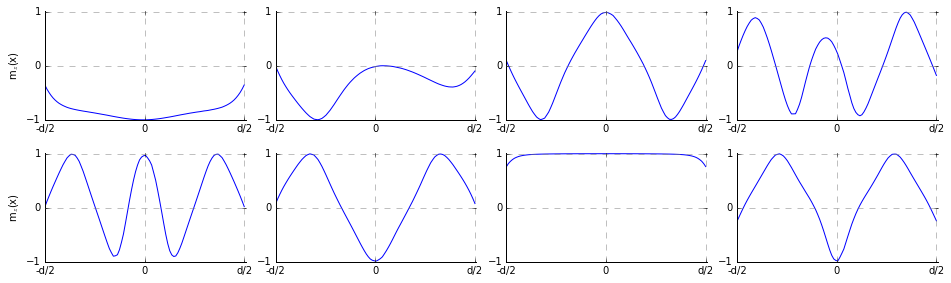

In [4]:
# set up the figure
fig = plt.figure(figsize=(16,4.5))
gs = gridspec.GridSpec(2, 4, height_ratios=[1,1], hspace=0.3, wspace=0.15)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[0,2])
ax3 = plt.subplot(gs[0,3])
ax4 = plt.subplot(gs[1,0])
ax5 = plt.subplot(gs[1,1])
ax6 = plt.subplot(gs[1,2])
ax7 = plt.subplot(gs[1,3])

# Note that 'states' is a list of index values associated with the hysteresis loop simulation.
# They define which step number from the hysteresis simulation where these 3D plots were taken
# from. There were 801 steps in the hysteresis loop in total. Thus the first 3D plot, (a)
# was the relaxed state from the 155th step of the hysteresis.
states = [155, 175, 184, 210, 215, 225, 304, 217]
labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']

for i, state in enumerate(states):
    
    if state == 217:
        mz = np.load('../data/figure_1/magnetisation_profiles/'\
                     'hysteresis_probe_d150_h35_mz{}.npy'.format(state))
    else:
        mz = np.load('../data/figure_1/magnetisation_profiles/'\
                     'hysteresis_probe_d150_h55_mz{}.npy'.format(state))
    ax = eval('ax{}'.format(i))
    ax.plot(x_coords, mz)
    
    ax.axes.set_ylim([-1,1.02])
    ax.axes.set_yticks([-1,0,1])
    ax.axes.set_yticks([0, 1], minor=True)
    
    ax.axes.set_xlim([-75,76])
    ax.axes.set_xticks([-75,0,75])
    ax.axes.set_xticks([0, 75], minor=True)
    ax.axes.set_xticklabels(['-d/2',0,'d/2'])
    
    ax.axes.grid(b=True, which='minor', color='grey', linestyle='--')
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

ax0.set_ylabel(r'm$_z$(x)')
ax4.set_ylabel(r'm$_z$(x)')

fig.show()
